# Prediction using Supervised Machine Learning.

Pratham Javalkoti

Graduate Rotational Internship Program, The Sparks Foundation.

Problem Statement:

We need to predict the percentage of student depending upon his/her study hours.

# Step 1: Laying The Foundations.

In [17]:
# Including necessary libraries.

import pandas
import numpy
import matplotlib

In [18]:
# Importing the Dataset.

link = "student_scores.csv"
myData = pandas.read_csv(link)
print("Dataframe Created.")
myData.head(5)

Dataframe Created.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


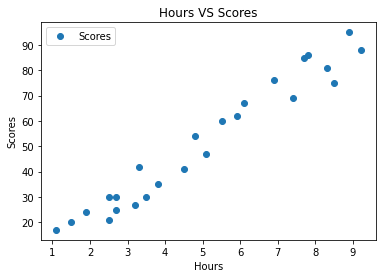

In [19]:
# Visualizing the DataFrame
myData.plot(x = "Hours", y = "Scores", style = 'o')
matplotlib.pyplot.title("Hours VS Scores")
matplotlib.pyplot.xlabel("Hours")
matplotlib.pyplot.ylabel("Scores")
matplotlib.pyplot.show()

The above graph represents the correlation between Hours and Scores. In order to calculate the coefficient of correlation we can write a python script for it.

In [20]:
x = myData["Hours"]
y = myData["Scores"]
rho = numpy.corrcoef(x, y)
print(rho)

[[1.         0.97619066]
 [0.97619066 1.        ]]


# Preparing The Data

Here we create the input and ouput. Input will be Hours Attribute and Output will be Scores Attribute as we are guessing the score on the basis of hour.

In [21]:
X = myData.iloc[:, :-1].values
Y = myData.iloc[:, 1].values

Now we have input as X which is our Hours Attribute and Y as our output which is Scores. We need to split the data in terms of training data and testing data by using in built method.

In [22]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Training The Model

Here we train the machine learning model with the help of training data and algorithm.

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_Train, Y_Train)

print("Our model is ready!")

Our model is ready!


Calculating the Slope and Intercept.

In [24]:
print(model.coef_)

[9.91065648]


In [25]:
print(model.intercept_)

2.018160041434683


Representing the line of Y.
Formula: y = mx + c,
m = model.coef_,
c = model.intercept_ .

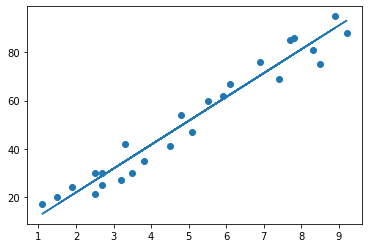

In [26]:
line = (model.coef_ * X) + model.intercept_

matplotlib.pyplot.scatter(X, Y)
matplotlib.pyplot.plot(X, line)
matplotlib.pyplot.show()

# Testing The Model

Our model is ready. We need to test it now.

In [27]:
print(X_Test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
Y_Predicted = model.predict(X_Test)
print(Y_Predicted)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [29]:
Comparision = pandas.DataFrame({'Actual' : Y_Test, 'Predicted' : Y_Predicted})
print(Comparision)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


# Evaluating The Model

Now we need to evaluate the model depending upon the accuracy and mean absolute error.

In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score

Accuracy = r2_score(Y_Test, Y_Predicted)
Error = metrics.mean_absolute_error(Y_Test, Y_Predicted)
print("The Accuracy is ", Accuracy)
print("The Mean Absolute Error is ", Error)

The Accuracy is  0.9454906892105356
The Mean Absolute Error is  4.183859899002975


All Done!